# Tarefa 1 - Regressão Linear 
Feito por Carlos Bravo

DRE: 119136241

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import f

## Data Loading

In [2]:
df = pd.read_csv('data-t1.csv')
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Data Cleaning Analysis

Analisando para saber qual tipo de limpeza é necessária. Mas antes, pelo describe é possível perceber que tem uma coluna extra "Unnamed: 32" que não é necessária, então vamos excluí-la antes.

In [3]:
# Remove "Unnamed: 32" column
df = df.drop('Unnamed: 32', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Check df for missing values
df.isnull().sum().any()

False

In [5]:
# Check df for duplicates
df.duplicated().sum()

0

<AxesSubplot:>

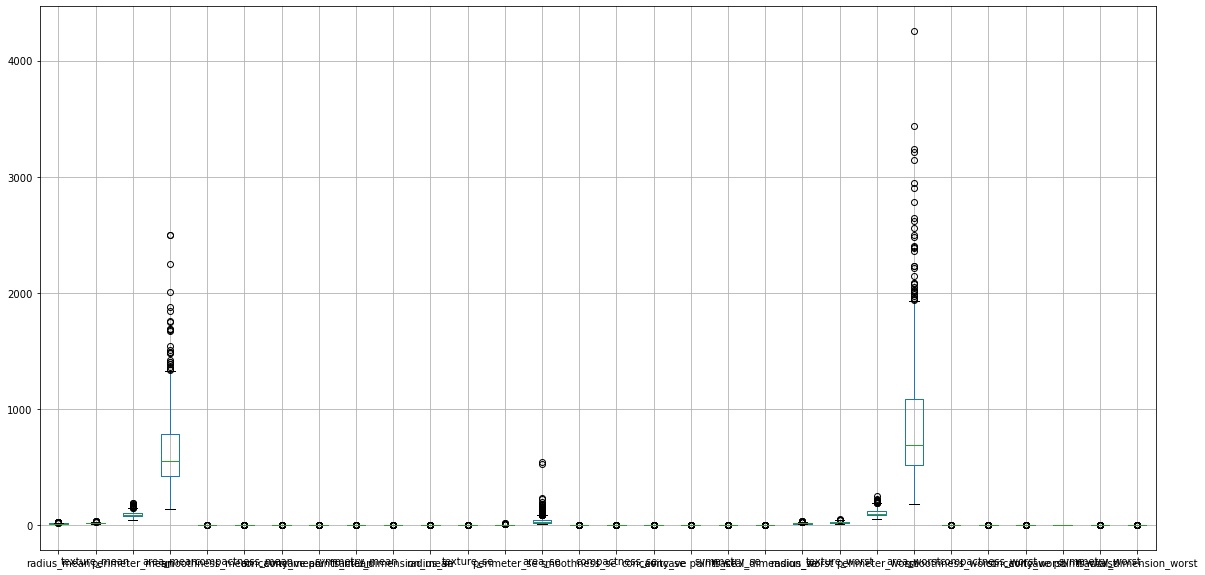

In [6]:
# Check df for outliers excluding "id" and "diagnosis" columns
df.drop(['id', 'diagnosis'], axis=1).boxplot(figsize=(20, 10))

## Data Cleaning

Não há valores duplicados nem nulos, mas há muitos outliers. Agora será feita sua limpeza.

In [7]:
# Remove df outliers in every column except "id" and "diagnosis"
for col in df.drop(['id', 'diagnosis'], axis=1).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,2.770000e+02,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,...,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,2.612058e+07,12.657874,17.855812,81.258051,501.577617,0.091094,0.073188,0.040040,0.025884,0.170335,...,14.051430,23.869928,91.151986,616.316968,0.124900,0.173859,0.159603,0.078858,0.271772,0.076544
std,1.105232e+08,1.665272,3.830038,11.127620,130.468302,0.011321,0.024962,0.027029,0.015289,0.019242,...,1.960982,5.510194,13.373403,171.575985,0.017722,0.072546,0.098525,0.034769,0.038415,0.009361
min,8.913000e+03,8.196000,9.710000,51.710000,201.900000,0.062510,0.019380,0.000000,0.000000,0.121500,...,8.964000,12.020000,57.260000,242.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210
25%,8.711220e+05,11.570000,15.210000,73.880000,409.100000,0.083110,0.053520,0.020450,0.016150,0.157300,...,12.970000,19.800000,83.120000,510.500000,0.111800,0.123100,0.084340,0.056900,0.243900,0.069490
50%,9.062900e+05,12.760000,17.460000,81.370000,496.600000,0.090300,0.070810,0.035460,0.023430,0.168700,...,13.880000,23.070000,89.710000,594.700000,0.124600,0.167900,0.145600,0.079110,0.268800,0.076280
75%,8.812818e+06,13.750000,19.630000,88.440000,584.800000,0.098790,0.088340,0.053750,0.032510,0.184700,...,15.330000,27.820000,99.700000,718.900000,0.137400,0.217000,0.224100,0.100100,0.299800,0.082160
max,9.113205e+08,16.840000,29.430000,108.400000,880.200000,0.123700,0.166100,0.147800,0.090290,0.223800,...,19.280000,40.540000,129.800000,1138.000000,0.173300,0.390400,0.434100,0.161400,0.384900,0.101700


<AxesSubplot:>

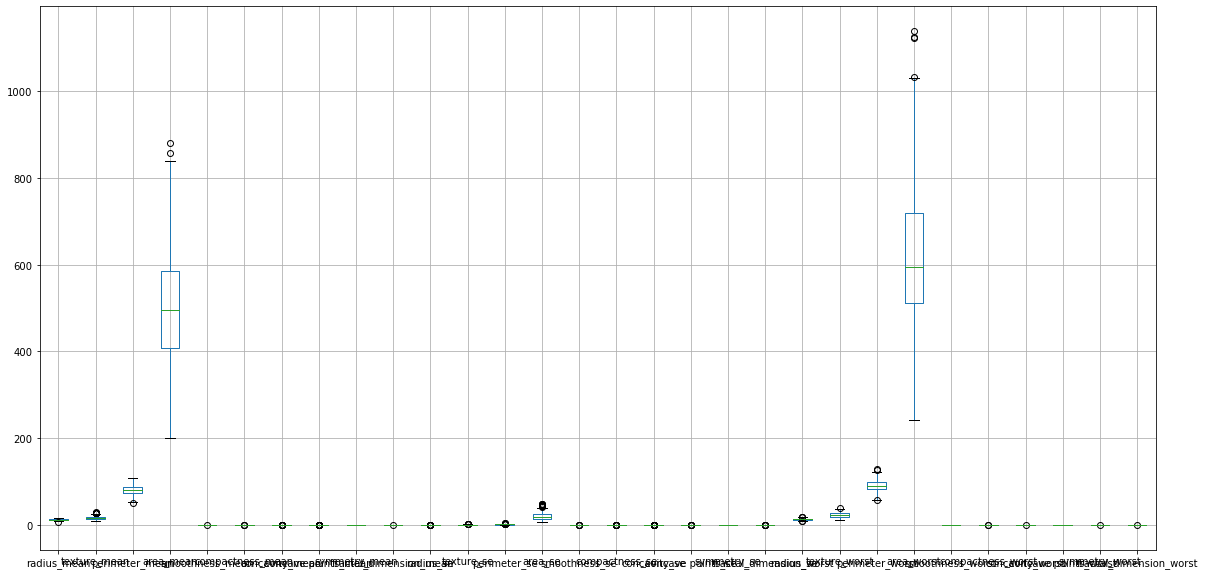

In [8]:
# Check df for outliers excluding "id" and "diagnosis" columns
df.drop(['id', 'diagnosis'], axis=1).boxplot(figsize=(20, 10))

Para fazer a regressão linear é necessário que os dados estejam normalizados. O único atributo problemático está sendo "diagnosis", então vamos transformá-lo em numérico.

In [9]:
# Convert "diagnosis" column to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

É possível remover a coluna "id", pois seu valor não é relevante para a análise.

In [10]:
# Remove df column "id"
df = df.drop('id', axis=1)

## Data Analysis

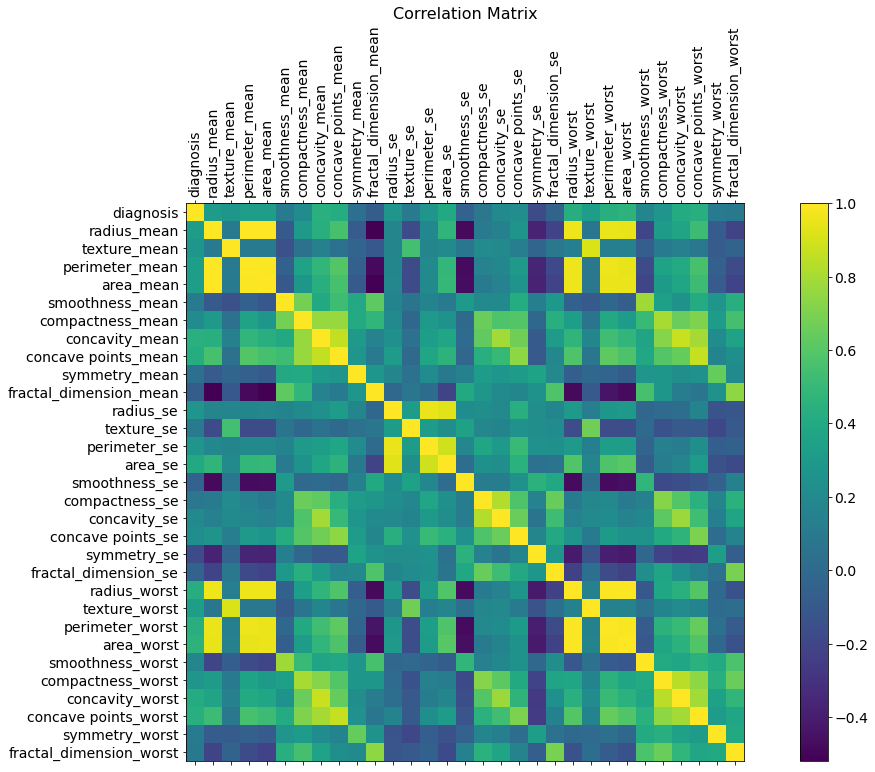

In [11]:
# Plot df correlation matrix
plt.figure(figsize=(20, 10))
plt.matshow(df.corr(), fignum=1)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [12]:
# Print most correlated features with "diagnosis"
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
area_worst                 0.464664
concavity_mean             0.444722
concave points_worst       0.433239
perimeter_worst            0.431658
radius_worst               0.429559
concave points_mean        0.423595
concavity_worst            0.411858
area_se                    0.401878
area_mean                  0.334084
texture_worst              0.327700
perimeter_mean             0.324481
radius_mean                0.312496
texture_mean               0.278581
compactness_worst          0.274518
radius_se                  0.272862
perimeter_se               0.272468
concave points_se          0.223030
compactness_mean           0.210681
concavity_se               0.206895
smoothness_worst           0.178275
symmetry_worst             0.109576
smoothness_mean            0.100188
texture_se                 0.096971
fractal_dimension_worst    0.092933
compactness_se             0.080592
symmetry_mean              0.033531
fractal_dimension_se      -0

Da matriz de correlação podemos tirar algumas informações:
1. Área, perímetro e raio são fortemente correlacionados. Isso faz muito sentido porque são fórmulas conhecidas.
2. A área é a variável mais correlacionada com o diagnóstico, seguida pela concavidade.
3. A simetria é a variável mais negativamente correlacionada, seguida pela dimensão da fractal.

Vamos plotar seus gráficos para vermos melhor.

In [13]:
# Calculate f-test
def f_test(X, y, y_pred, parameters=2):
    y_bar = np.mean(y)
    sse = np.sum((y - y_pred) ** 2)
    sst = np.sum((y - y_bar) ** 2)
    msr = (sst - sse) / parameters
    mse = sse / (len(X) - parameters)
    f_stat = msr / mse
    p_value = 1 - f.cdf(f_stat, 1, len(X) - parameters)

    return f_stat, p_value

In [14]:
# Function to plot scatter plot with regression line
def plot_regression(X, y, xlabel, ylabel, title, hue=None, legend=None, alpha=0.05, dfssr=2):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=X, y=y, hue=hue, palette='colorblind')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(legend)

    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y)
    y_pred = model.predict(X.values.reshape(-1, 1))

    # Print R^2
    r2 = model.score(X.values.reshape(-1, 1), y)
    print('R^2:', r2)

    # Print f-test 
    fresult = f_test(X, y, y_pred)
    print('F-test:', fresult[0])

    # Compare f-test with critical value
    dfsse = len(X) - dfssr
    iris_critical_value = f.ppf(1 - alpha, dfssr, dfsse)
    print('Critical value:', iris_critical_value)

    if fresult[0] > iris_critical_value:
        print('F-test maior que valor crítico. Rejeitar hipótese nula.')
    else:
        print('F-test menor que valor crítico. Falha ao rejeitar hipótese nula.')

    plt.plot(X, y_pred, color='black')
    plt.show()

R^2: 0.987190940854958
F-test: 10597.090139918442
Critical value: 3.0286047972100776
F-test maior que valor crítico. Rejeitar hipótese nula.


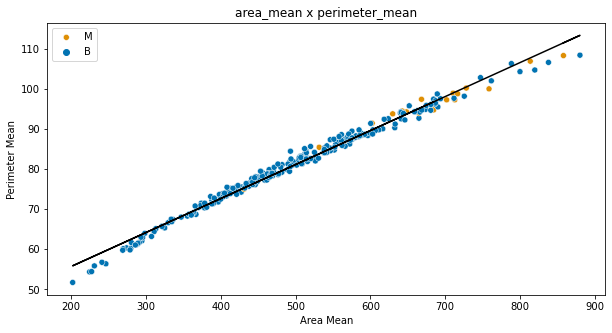

In [15]:
# Plot scatter plot with regression line for "area_mean" and "perimeter_mean" features colored by "diagnosis"
plot_regression(df['area_mean'], df['perimeter_mean'], 'Area Mean', 'Perimeter Mean', 'area_mean x perimeter_mean', df['diagnosis'], ['M', 'B'])

R^2: 0.9915799320520807
F-test: 16192.53449027732
Critical value: 3.0286047972100776
F-test maior que valor crítico. Rejeitar hipótese nula.


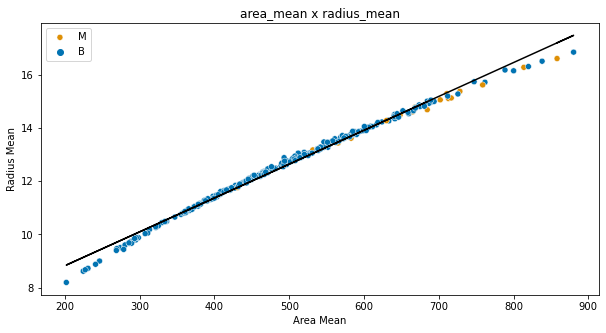

In [16]:
# Plot scatter plot of "area_mean" and "radius_mean" features colored by "diagnosis"
plot_regression(df['area_mean'], df['radius_mean'], 'Area Mean', 'Radius Mean', 'area_mean x radius_mean', df['diagnosis'], ['M', 'B'])

R^2: 0.9960613572297877
F-test: 34773.00293768812
Critical value: 3.0286047972100776
F-test maior que valor crítico. Rejeitar hipótese nula.


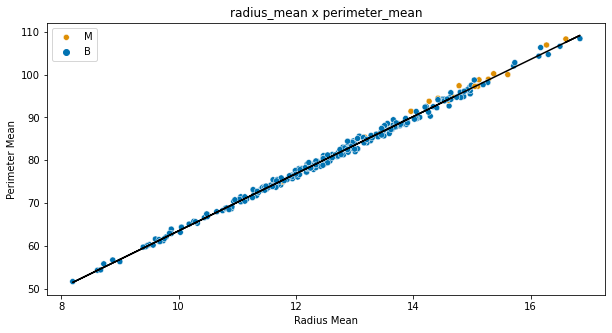

In [17]:
# Plot scatter plot of "radius_mean" and "perimeter_mean" features colored by "diagnosis"
plot_regression(df['radius_mean'], df['perimeter_mean'], 'Radius Mean', 'Perimeter Mean', 'radius_mean x perimeter_mean', df['diagnosis'], ['M', 'B'])

Com os gráficos acima é possível provar que a matemática euclidiana ainda funciona, mas isso não interessa no diagnóstico.

R^2: 0.16780992497889557
F-test: 27.726676125058283
Critical value: 3.0286047972100776
F-test maior que valor crítico. Rejeitar hipótese nula.


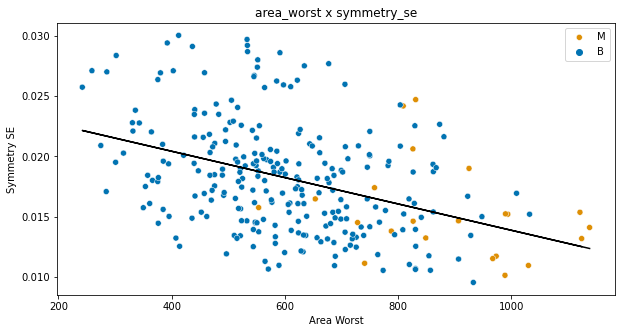

In [22]:
# Plot scatter plot of "area_worst" and "symmetry_se" features colored by "diagnosis"
plot_regression(df['area_worst'], df['symmetry_se'], 'Area Worst', 'Symmetry SE', 'area_worst x symmetry_se', df['diagnosis'], ['M', 'B'])

R^2: 0.22859003635966768
F-test: 40.74504022624859
Critical value: 3.0286047972100776
F-test maior que valor crítico. Rejeitar hipótese nula.


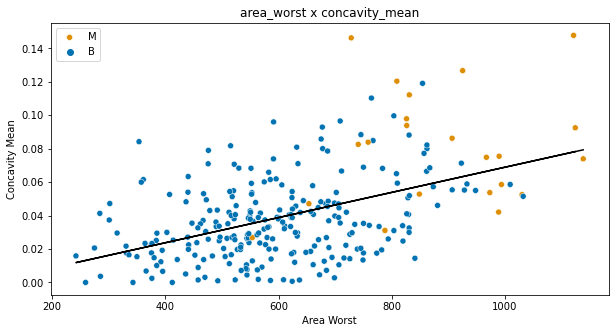

In [29]:
# Plot scatter plot of "area_worst" and "concavity_mean" features colored by "diagnosis"
plot_regression(df['area_worst'], df['concavity_mean'], 'Area Worst', 'Concavity Mean', 'area_worst x concavity_mean', df['diagnosis'], ['M', 'B'])

Fazendo o gráfico do atributo mais positivamente correlacionado (area_worst) com o segundo (concavity_mean) e com o mais negativamente correlacionado (symmetry_mean), podemos ver que os diagnósticos "M" estão mais agrupados em um canto do gráfico.

Infelizmente não é possível realizar uma análise mais profunda pois não foram dados objetivos a serem verificados com os dados. No entanto, ainda é possível ver uma amostra do que é possível fazer com os dados e como eles se comportam.

## Referências
1. GitHub Copilot
0. Documentação Pandas
0. Documentação SeaBorn
0. Documentação SciKit Learn
0. https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/amp/
0. http://www.socr.ucla.edu/Applets.dir/F_Table.html
0. Slides da aula 2 de Introdução ao Aprendizado de Máquina
